In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d devendra416/ddos-datasets

100% 2.67G/2.68G [00:48<00:00, 111MB/s]
100% 2.68G/2.68G [00:48<00:00, 59.2MB/s]


In [ ]:
!unzip /content/ddos-datasets.zip

Archive:  /content/ddos-datasets.zip
  inflating: ddos_balanced/final_dataset.csv  
  inflating: ddos_imbalanced/unbalaced_20_80_dataset.csv  


In [ ]:
import random

In [ ]:
dtypes = {
    'Src IP': 'category',
    'Src Port': 'uint16',
    'Dst IP': 'category',
    'Dst Port': 'uint16',
    'Protocol': 'category',
    'Flow Duration': 'uint32',
    'Tot Fwd Pkts': 'uint32',
    'Tot Bwd Pkts': 'uint32',
    'TotLen Fwd Pkts': 'float32',
    'TotLen Bwd Pkts': 'float32',
    'Fwd Pkt Len Max': 'float32',
    'Fwd Pkt Len Min': 'float32',
    'Fwd Pkt Len Mean': 'float32',
    'Fwd Pkt Len Std': 'float32',
    'Bwd Pkt Len Max': 'float32',
    'Bwd Pkt Len Min': 'float32',
    'Bwd Pkt Len Mean': 'float32',
    'Bwd Pkt Len Std': 'float32',
    'Flow Byts/s': 'float32',
    'Flow Pkts/s': 'float32',
    'Flow IAT Mean': 'float32',
    'Flow IAT Std': 'float32',
    'Flow IAT Max': 'float32',
    'Flow IAT Min': 'float32',
    'Fwd IAT Tot': 'float32',
    'Fwd IAT Mean': 'float32',
    'Fwd IAT Std': 'float32',
    'Fwd IAT Max': 'float32',
    'Fwd IAT Min': 'float32',
    'Bwd IAT Tot': 'float32',
    'Bwd IAT Mean': 'float32',
    'Bwd IAT Std': 'float32',
    'Bwd IAT Max': 'float32',
    'Bwd IAT Min': 'float32',
    'Fwd PSH Flags': 'category',
    'Bwd PSH Flags': 'category',
    'Fwd URG Flags': 'category',
    'Bwd URG Flags': 'category',
    'Fwd Header Len': 'uint32',
    'Bwd Header Len': 'uint32',
    'Fwd Pkts/s': 'float32',
    'Bwd Pkts/s': 'float32',
    'Pkt Len Min': 'float32',
    'Pkt Len Max': 'float32',
    'Pkt Len Mean': 'float32',
    'Pkt Len Std': 'float32',
    'Pkt Len Var': 'float32',
    'FIN Flag Cnt': 'category',
    'SYN Flag Cnt': 'category',
    'RST Flag Cnt': 'category',
    'PSH Flag Cnt': 'category',
    'ACK Flag Cnt': 'category',
    'URG Flag Cnt': 'category',
    'CWE Flag Count': 'category',
    'ECE Flag Cnt': 'category',
    'Down/Up Ratio': 'float32',
    'Pkt Size Avg': 'float32',
    'Fwd Seg Size Avg': 'float32',
    'Bwd Seg Size Avg': 'float32',
    'Fwd Byts/b Avg': 'uint32',
    'Fwd Pkts/b Avg': 'uint32',
    'Fwd Blk Rate Avg': 'uint32',
    'Bwd Byts/b Avg': 'uint32',
    'Bwd Pkts/b Avg': 'uint32',
    'Bwd Blk Rate Avg': 'uint32',
    'Subflow Fwd Pkts': 'uint32',
    'Subflow Fwd Byts': 'uint32',
    'Subflow Bwd Pkts': 'uint32',
    'Subflow Bwd Byts': 'uint32',
    'Init Fwd Win Byts': 'uint32',
    'Init Bwd Win Byts': 'uint32',
    'Fwd Act Data Pkts': 'uint32',
    'Fwd Seg Size Min': 'uint32',
    'Active Mean': 'float32',
    'Active Std': 'float32',
    'Active Max': 'float32',
    'Active Min': 'float32',
    'Idle Mean': 'float32',
    'Idle Std': 'float32',
    'Idle Max': 'float32',
    'Idle Min': 'float32',
    'Label': 'category'
}

In [ ]:
from tqdm import tqdm
from IPython.display import display
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
p = 0.10  # 10% of the data

df = pd.read_csv('/content/ddos_balanced/final_dataset.csv', dtype=dtypes,
                 skiprows=lambda i: i>0 and random.random() > p, low_memory=False)
del dtypes

In [ ]:
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,632,192.168.4.118-203.73.24.75-4508-80-6,192.168.4.118,4508,203.73.24.75,80,6,12/06/2010 08:34:37 AM,468629,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,646,192.168.4.118-203.73.24.75-4513-80-6,192.168.4.118,4513,203.73.24.75,80,6,12/06/2010 08:34:41 AM,506932,6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,652,192.168.4.118-203.73.24.75-4514-80-6,192.168.4.118,4514,203.73.24.75,80,6,12/06/2010 08:34:42 AM,534657,6,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,665,192.168.4.118-203.73.24.75-4516-80-6,192.168.4.118,4516,203.73.24.75,80,6,12/06/2010 08:34:46 AM,3510951,24,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,812,192.168.4.118-203.73.24.75-4525-80-6,192.168.4.118,4525,203.73.24.75,80,6,12/06/2010 08:36:34 AM,974,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [ ]:
df.describe()


,Unnamed: 0,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,...,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1.279861e+06,1279861.0,1.279861e+06,1.279861e+06,1.279861e+06
mean,2.665064e+06,3.709283e+04,1.462665e+04,8.258635e+06,2.586792e+01,5.317747e+00,1.075277e+03,3.932938e+03,2.918072e+02,7.101657e+00,...,2.258161e+01,8.136224e+00,1.357933e+05,6.996530e+04,2.041834e+05,8.870570e+04,3117204.0,1.091415e+05,3.212648e+06,3.016174e+06
std,2.171340e+06,2.521617e+04,2.305586e+04,2.513310e+07,1.685331e+03,3.791380e+02,5.322821e+04,8.143420e+05,3.918419e+02,1.967526e+01,...,1.662821e+03,9.141879e+00,2.284356e+06,1.406191e+06,3.037598e+06,1.909205e+06,12175691.0,1.419169e+06,1.242751e+07,1.204849e+07
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.985920e+05,4.430000e+02,8.000000e+01,1.259000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.043046e+06,5.059800e+04,8.000000e+01,3.229300e+04,2.000000e+00,1.000000e+00,4.200000e+01,1.130000e+02,4.000000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.914853e+06,5.622100e+04,3.850800e+04,4.160044e+06,4.000000e+00,4.000000e+00,9.350000e+02,3.580000e+02,6.770000e+02,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
max,7.902444e+06,6.553500e+04,6.553400e+04,4.294967e+09,2.723360e+05,2.912610e+05,8.714752e+06,6.410007e+08,9.576000e+03,1.472000e+03,...,2.723360e+05,4.400000e+01,1.113442e+08,7.141645e+07,1.113442e+08,1.113442e+08,119999736.0,6.585306e+07,1.199997e+08,1.199997e+08


In [ ]:
df.shape


(1279861, 85)

In [ ]:
colsToDrop = np.array(['Src IP', 'Dst IP', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
                       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Flow ID', 'Timestamp', 'Unnamed: 0'])

In [ ]:
df = df.rename(columns={'label': 'Label'})

In [ ]:
df.Label.value_counts()

ddos      646375
Benign    633486
Name: Label, dtype: int64

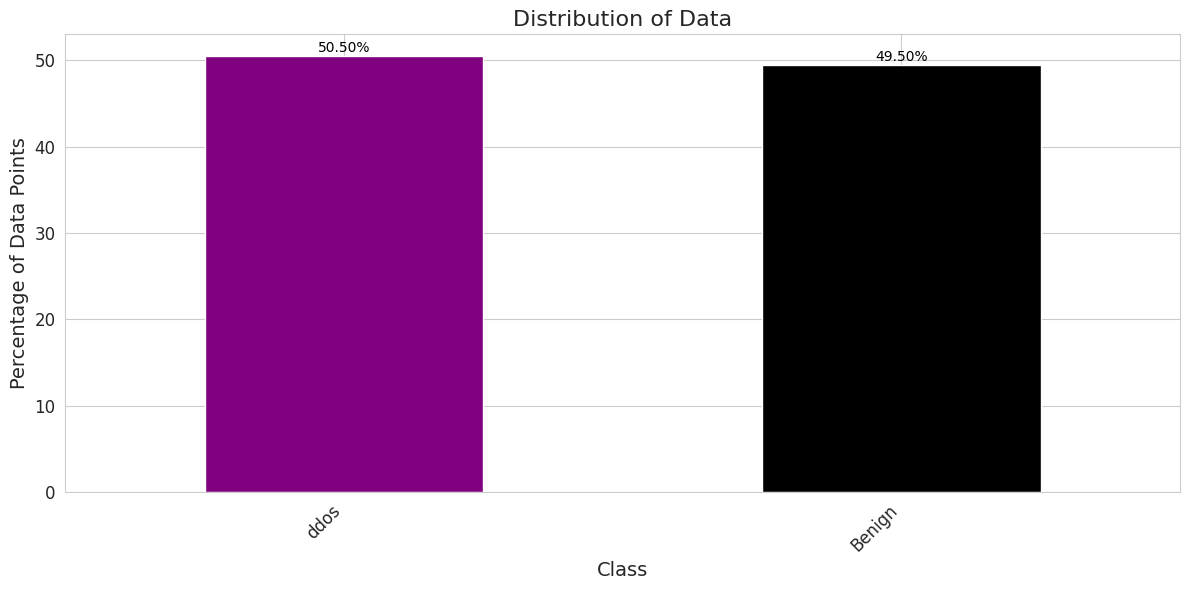

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Set seaborn style

class_distribution = df['Label'].value_counts(normalize=True) * 100  # Calculate percentages
colors = ['purple', 'black']  # List of colors for bars

barplot = class_distribution.plot(kind='bar', color=colors)

plt.xlabel('Class', fontsize=14)
plt.ylabel('Percentage of Data Points', fontsize=14)
plt.title('Distribution of Data', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add percentage labels on top of each bar
for i, value in enumerate(class_distribution):
    barplot.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
rowbuilder = lambda col: {'col': col, 'unique_values': df[col].nunique(), 'most_frequent_value': df[col].value_counts().index[0],'frequency': df[col].value_counts(normalize=True).values[0]}
frequency = [rowbuilder(col) for col in df.select_dtypes(include=['category']).columns]
skewed = pd.DataFrame(frequency)
skewed = skewed[skewed['frequency'] >= 0.95]
colsToDrop = np.union1d(colsToDrop, skewed['col'].values)
colsToDrop
del skewed
del rowbuilder
del frequency

missing = df.isna().sum()
missing = pd.DataFrame({'count': missing, '% of total': missing/len(df)*100}, index=df.columns)
colsToDrop = np.union1d(colsToDrop, missing[missing['% of total'] >= 50].index.values)
dropnaCols = missing[(missing['% of total'] > 0) & (missing['% of total'] <= 5)].index.values


In [ ]:
dropnaCols = np.union1d(dropnaCols, ['Flow Byts/s', 'Flow Pkts/s'])


In [ ]:
# perform actual drop
df.drop(columns=colsToDrop, inplace=True)
df.dropna(subset=dropnaCols, inplace=True)

print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))


After dropping some columns: 
	 there are 68 columns and 1276917 rows


In [ ]:
negValCols = ['Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Min']
for col in negValCols:
    df = df[df[col] >= 0]

In [ ]:
df.describe()


,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,...,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1.276871e+06,1276871.0,1.276871e+06,1276871.0,1276871.0
mean,3.717639e+04,1.454158e+04,8.272755e+06,2.556135e+01,4.847535e+00,1.077619e+03,2.868042e+03,2.924700e+02,7.118230e+00,7.630565e+01,...,2.263334e+01,8.109499e+00,1.360741e+05,7.009747e+04,2.045876e+05,8.889670e+04,3124073.5,1.093825e+05,3219731.5,3022820.5
std,2.518410e+04,2.301290e+04,2.486848e+07,1.665346e+03,1.186738e+02,5.329044e+04,1.708952e+05,3.920357e+02,1.969524e+01,9.424234e+01,...,1.664766e+03,9.134713e+00,2.286908e+06,1.407684e+06,3.040905e+06,1.911408e+06,12188366.0,1.420772e+06,12440429.0,12061088.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
25%,4.430000e+02,8.000000e+01,1.270000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
50%,5.061700e+04,8.000000e+01,3.276700e+04,2.000000e+00,1.000000e+00,4.200000e+01,1.140000e+02,4.000000e+01,0.000000e+00,3.600000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
75%,5.624000e+04,3.816600e+04,4.164575e+06,4.000000e+00,4.000000e+00,9.350000e+02,3.580000e+02,6.770000e+02,0.000000e+00,1.420000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0
max,6.553500e+04,6.553400e+04,1.200000e+08,2.723360e+05,2.580600e+04,8.714752e+06,3.758338e+07,9.576000e+03,1.472000e+03,2.064829e+03,...,2.723360e+05,4.400000e+01,1.113442e+08,7.141645e+07,1.113442e+08,1.113442e+08,119999736.0,6.585306e+07,119999736.0,119999736.0


In [ ]:
df.shape


(1276871, 68)

In [ ]:
styled_df = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3935: RuntimeWarning: invalid value encountered in scalar multiply
  norm = mpl.colors.Normalize(smin - (rng * low), smax + (rng * high))


,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
mean,37176.385869,14541.584319,8272754.951480,25.561352,4.847535,1077.619385,2868.042236,292.470001,7.118230,76.305649,130.891617,301.923645,16.974848,92.111496,122.821793,inf,inf,1869152.000000,956418.875000,4351221.500000,1459116.250000,7195120.000000,1920038.250000,734207.750000,3363729.250000,1470050.375000,5842358.500000,841144.562500,1036550.125000,2617964.250000,216039.796875,264.107557,111.725131,15910.602539,9367.134766,7.179575,433.344330,78.400604,141.395920,47939.542969,0.696257,89.846642,76.305649,92.111496,25.561352,1077.619522,4.847535,2868.042581,2836467573.887147,1205692657.521858,22.633336,8.109499,136074.078125,70097.468750,204587.593750,88896.695312,3124073.500000,109382.515625,3219731.500000,3022820.500000
std,25184.096466,23012.896224,24868483.995719,1665.346345,118.673812,53290.441406,170895.250000,392.035736,19.695242,94.242340,188.920822,442.390564,42.358780,140.938339,181.433090,nan,nan,8913134.000000,3427503.000000,13031464.000000,8821181.000000,24584082.000000,9006550.000000,3544911.000000,12344123.000000,8844804.000000,21477304.000000,4035747.250000,3706724.000000,9528522.000000,3371540.750000,13353.340724,2376.657329,154960.000000,80433.468750,17.593960,514.221436,94.081749,167.172836,78551.000000,1.119511,100.163757,94.242340,140.938339,1665.346345,53290.440888,118.673812,170895.250574,2033956567.128208,1929941669.038286,1664.766111,9.134713,2286908.500000,1407684.000000,3040905.000000,1911408.000000,12188366.000000,1420772.250000,12440429.000000,12061088.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,443.000000,80.000000,1270.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.187707,959.000000,0.000000,1066.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,16.000000,0.953873,0.923087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8192.000000,219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50617.000000,80.000000,32767.000000,2.000000,1.000000,42.000000,114.000000,40.000000,0.000000,36.000000,0.000000,100.000000,0.000000,68.000000,0.000000,293.774414,86.516418,19191.000000,256.567352,30320.000000,47.000000,1289.000000,465.333344,0.000000,1037.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,32.000000,38.764572,21.947634,0.000000,101.000000,54.500000,35.054245,1228.800049,1.000000,77.000000,36.000000,68.000000,2.000000,42.000000,1.000000,114.000000,4294967295.000000,32738.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
num_cols =  df.select_dtypes(exclude=['object']).columns
fwd_cols = [col for col in num_cols if 'Fwd' in col]
bwd_cols = [col for col in num_cols if 'Bwd' in col]

In [ ]:
def getCorrelatedFeatures(corr):
    correlatedFeatures = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > 0.95:
                print(corr.columns[i],corr.iloc[i,j])
                correlatedFeatures.add(corr.columns[i])
    return correlatedFeatures

<Axes: >

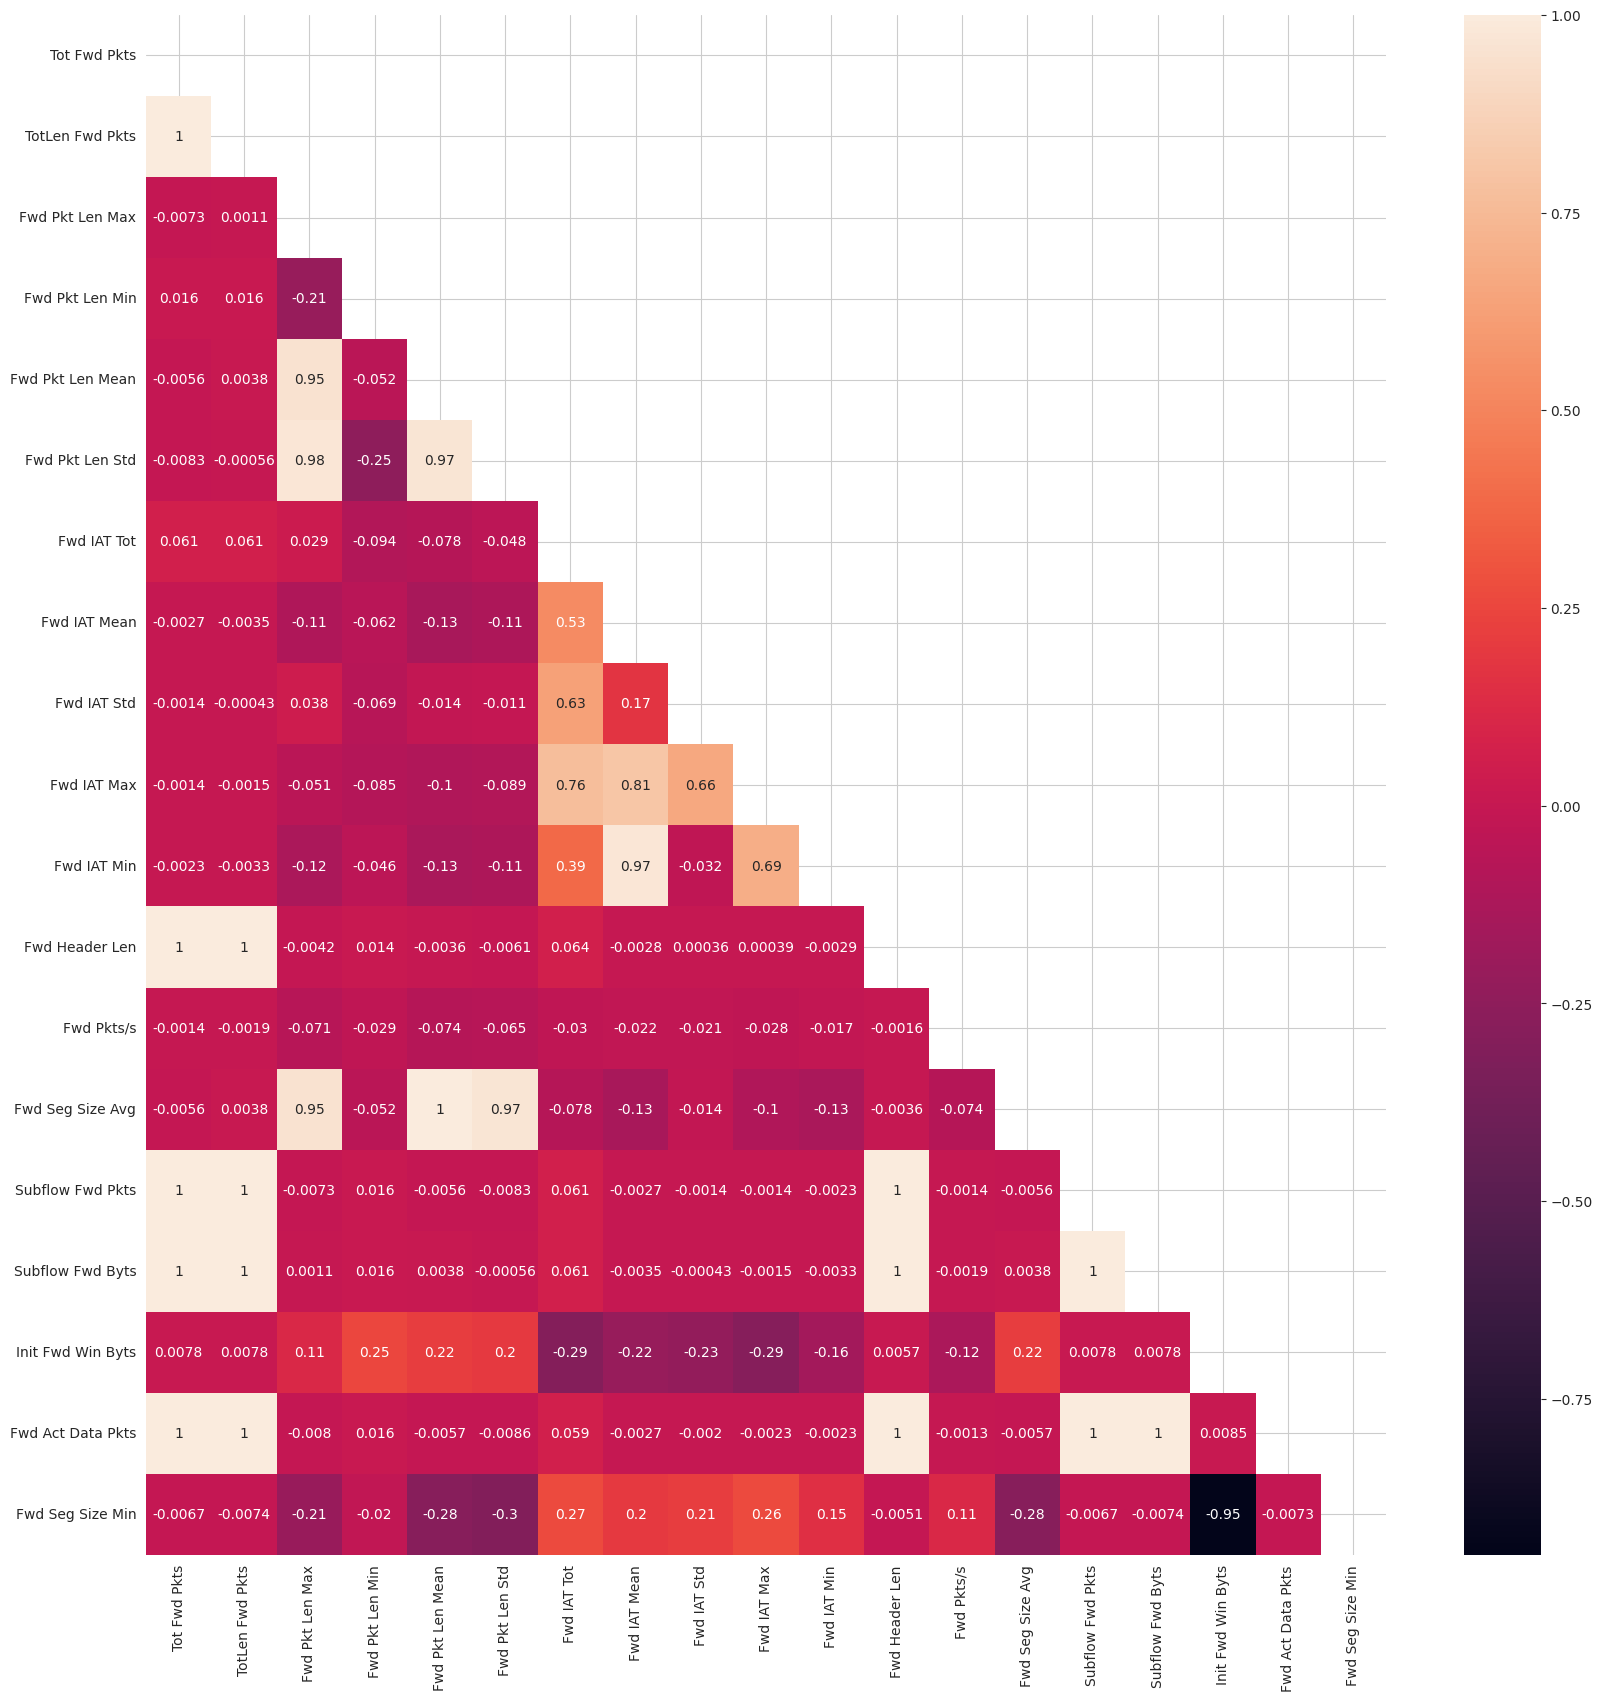

In [ ]:
corr = df[fwd_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=mask)

In [ ]:
correlatedFeatures = set()
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)

TotLen Fwd Pkts 0.9992978646012316
Fwd Pkt Len Mean 0.9501640593982925
Fwd Pkt Len Std 0.9757273036947737
Fwd Pkt Len Std 0.9664849950021631
Fwd IAT Min 0.9748296722574632
Fwd Header Len 0.9988964001769962
Fwd Header Len 0.997103513175571
Fwd Seg Size Avg 0.9501640593982925
Fwd Seg Size Avg 1.0
Fwd Seg Size Avg 0.9664849950021631
Subflow Fwd Pkts 1.0
Subflow Fwd Pkts 0.9992978646012316
Subflow Fwd Pkts 0.9988964001769962
Subflow Fwd Byts 0.9992978646012316
Subflow Fwd Byts 1.0
Subflow Fwd Byts 0.997103513175571
Subflow Fwd Byts 0.9992978646012316
Fwd Act Data Pkts 0.9996373069163551
Fwd Act Data Pkts 0.9996073815455285
Fwd Act Data Pkts 0.9973063639246736
Fwd Act Data Pkts 0.9996373069163551
Fwd Act Data Pkts 0.9996073815455285


In [ ]:
correlatedFeatures

{'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'TotLen Fwd Pkts'}

<Axes: >

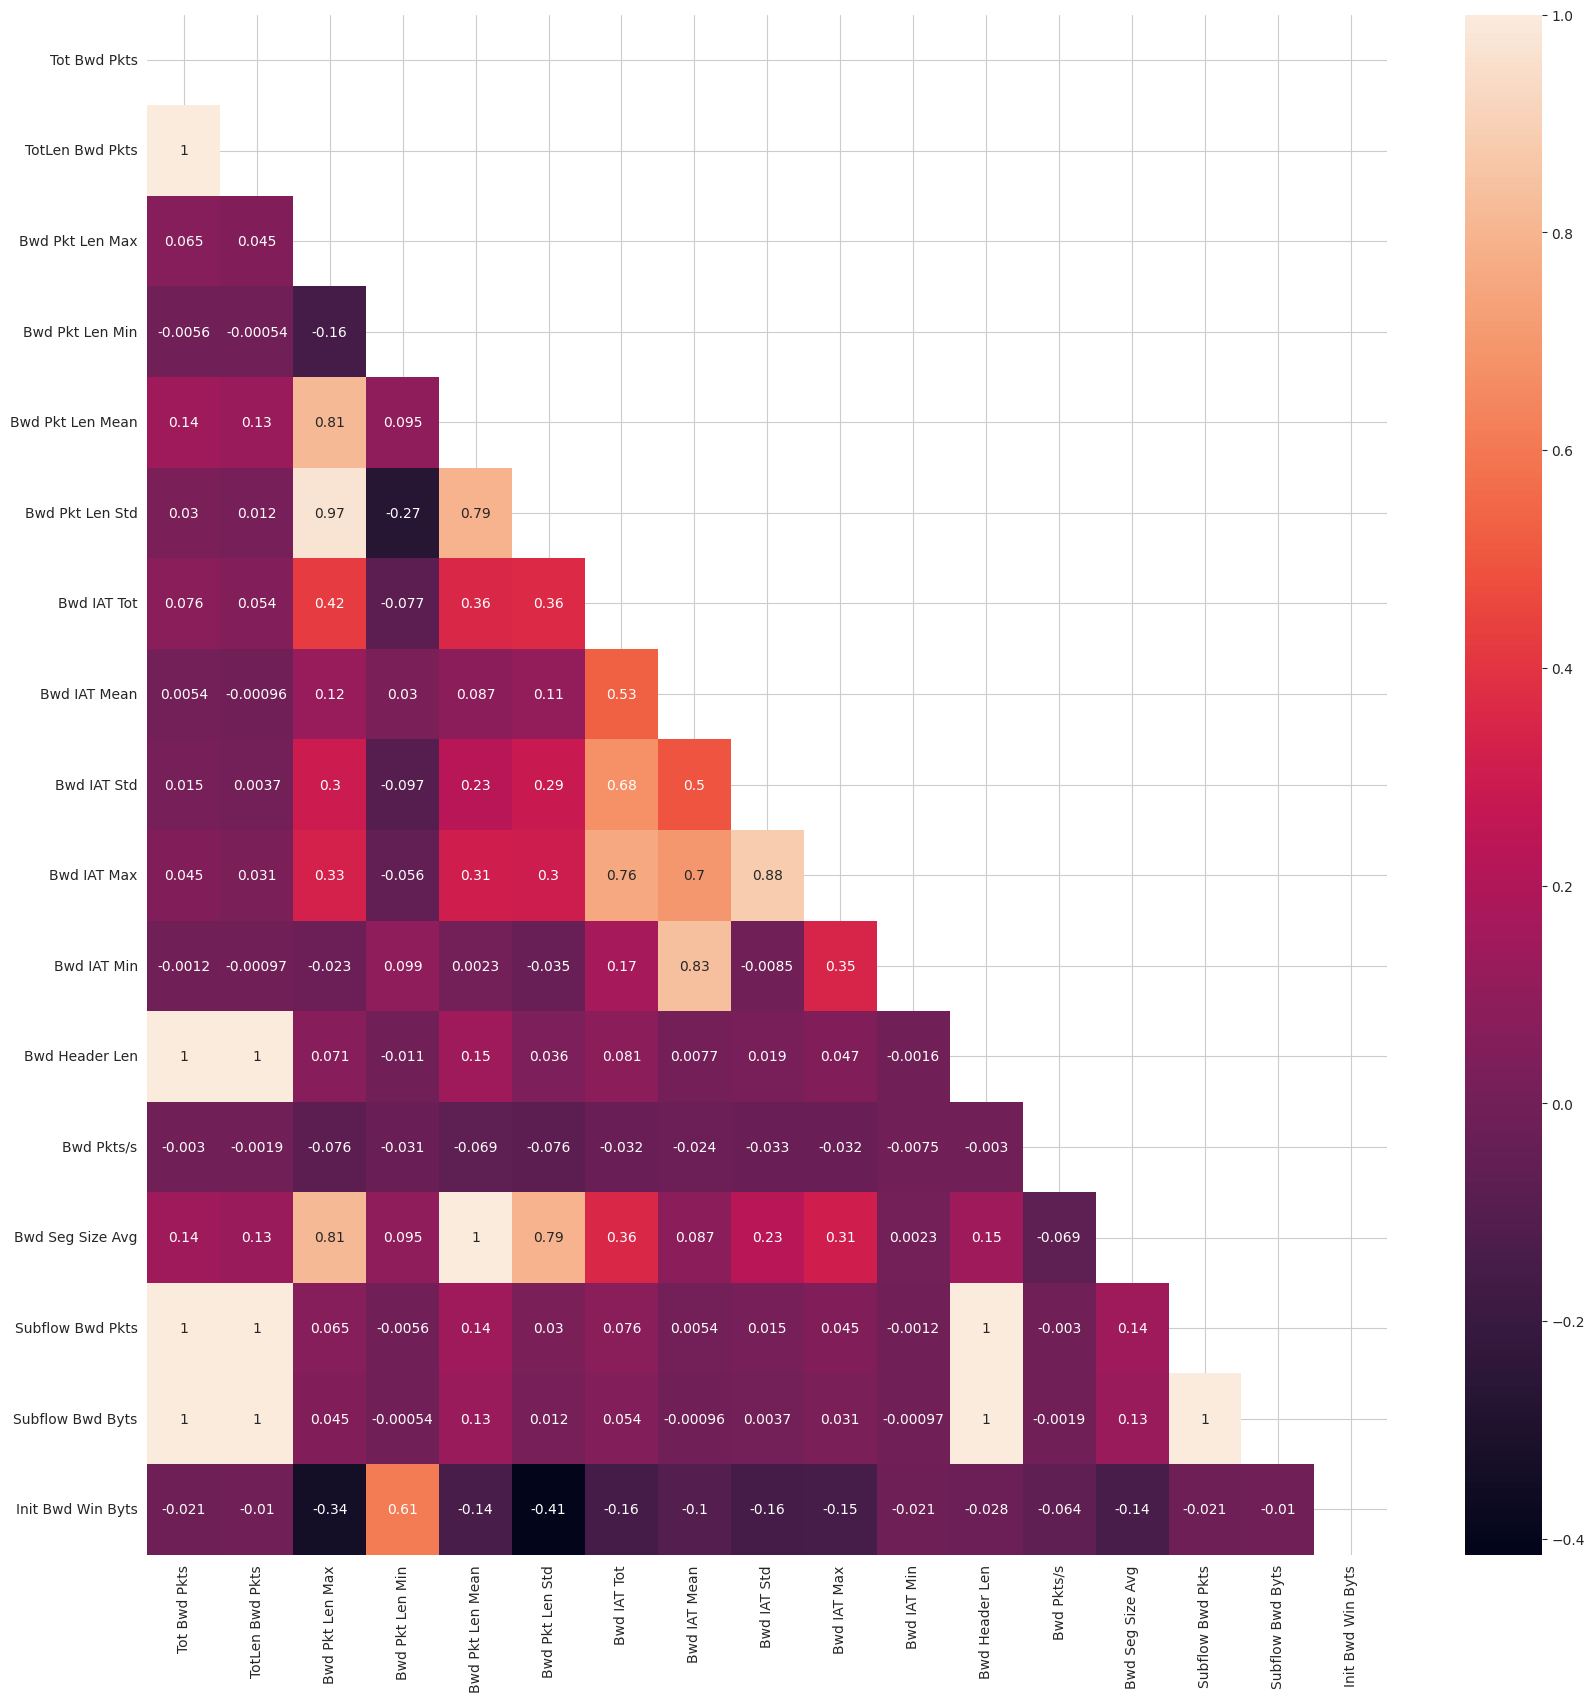

In [ ]:
corr = df[bwd_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr,annot=True, mask=mask)

In [ ]:
correlatedFeatures = correlatedFeatures | getCorrelatedFeatures(corr)
correlatedFeatures

TotLen Bwd Pkts 0.9955443732330708
Bwd Pkt Len Std 0.9677708928677793
Bwd Header Len 0.9995896209627815
Bwd Header Len 0.9952265492020848
Bwd Seg Size Avg 1.0
Subflow Bwd Pkts 1.0
Subflow Bwd Pkts 0.9955443732330708
Subflow Bwd Pkts 0.9995896209627815
Subflow Bwd Byts 0.9955443731963395
Subflow Bwd Byts 0.9999999999999984
Subflow Bwd Byts 0.9952265491725512
Subflow Bwd Byts 0.9955443731963395


{'Bwd Header Len',
 'Bwd Pkt Len Std',
 'Bwd Seg Size Avg',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Min',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Byts',
 'Subflow Fwd Pkts',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts'}

In [ ]:
df.drop(columns=correlatedFeatures, inplace=True)

In [ ]:
df.shape

(1276871, 53)

In [ ]:
num_cols = df.select_dtypes(exclude=['object']).columns
cols = [col for col in num_cols if 'Fwd' in col or 'Bwd' in col]

<Axes: >

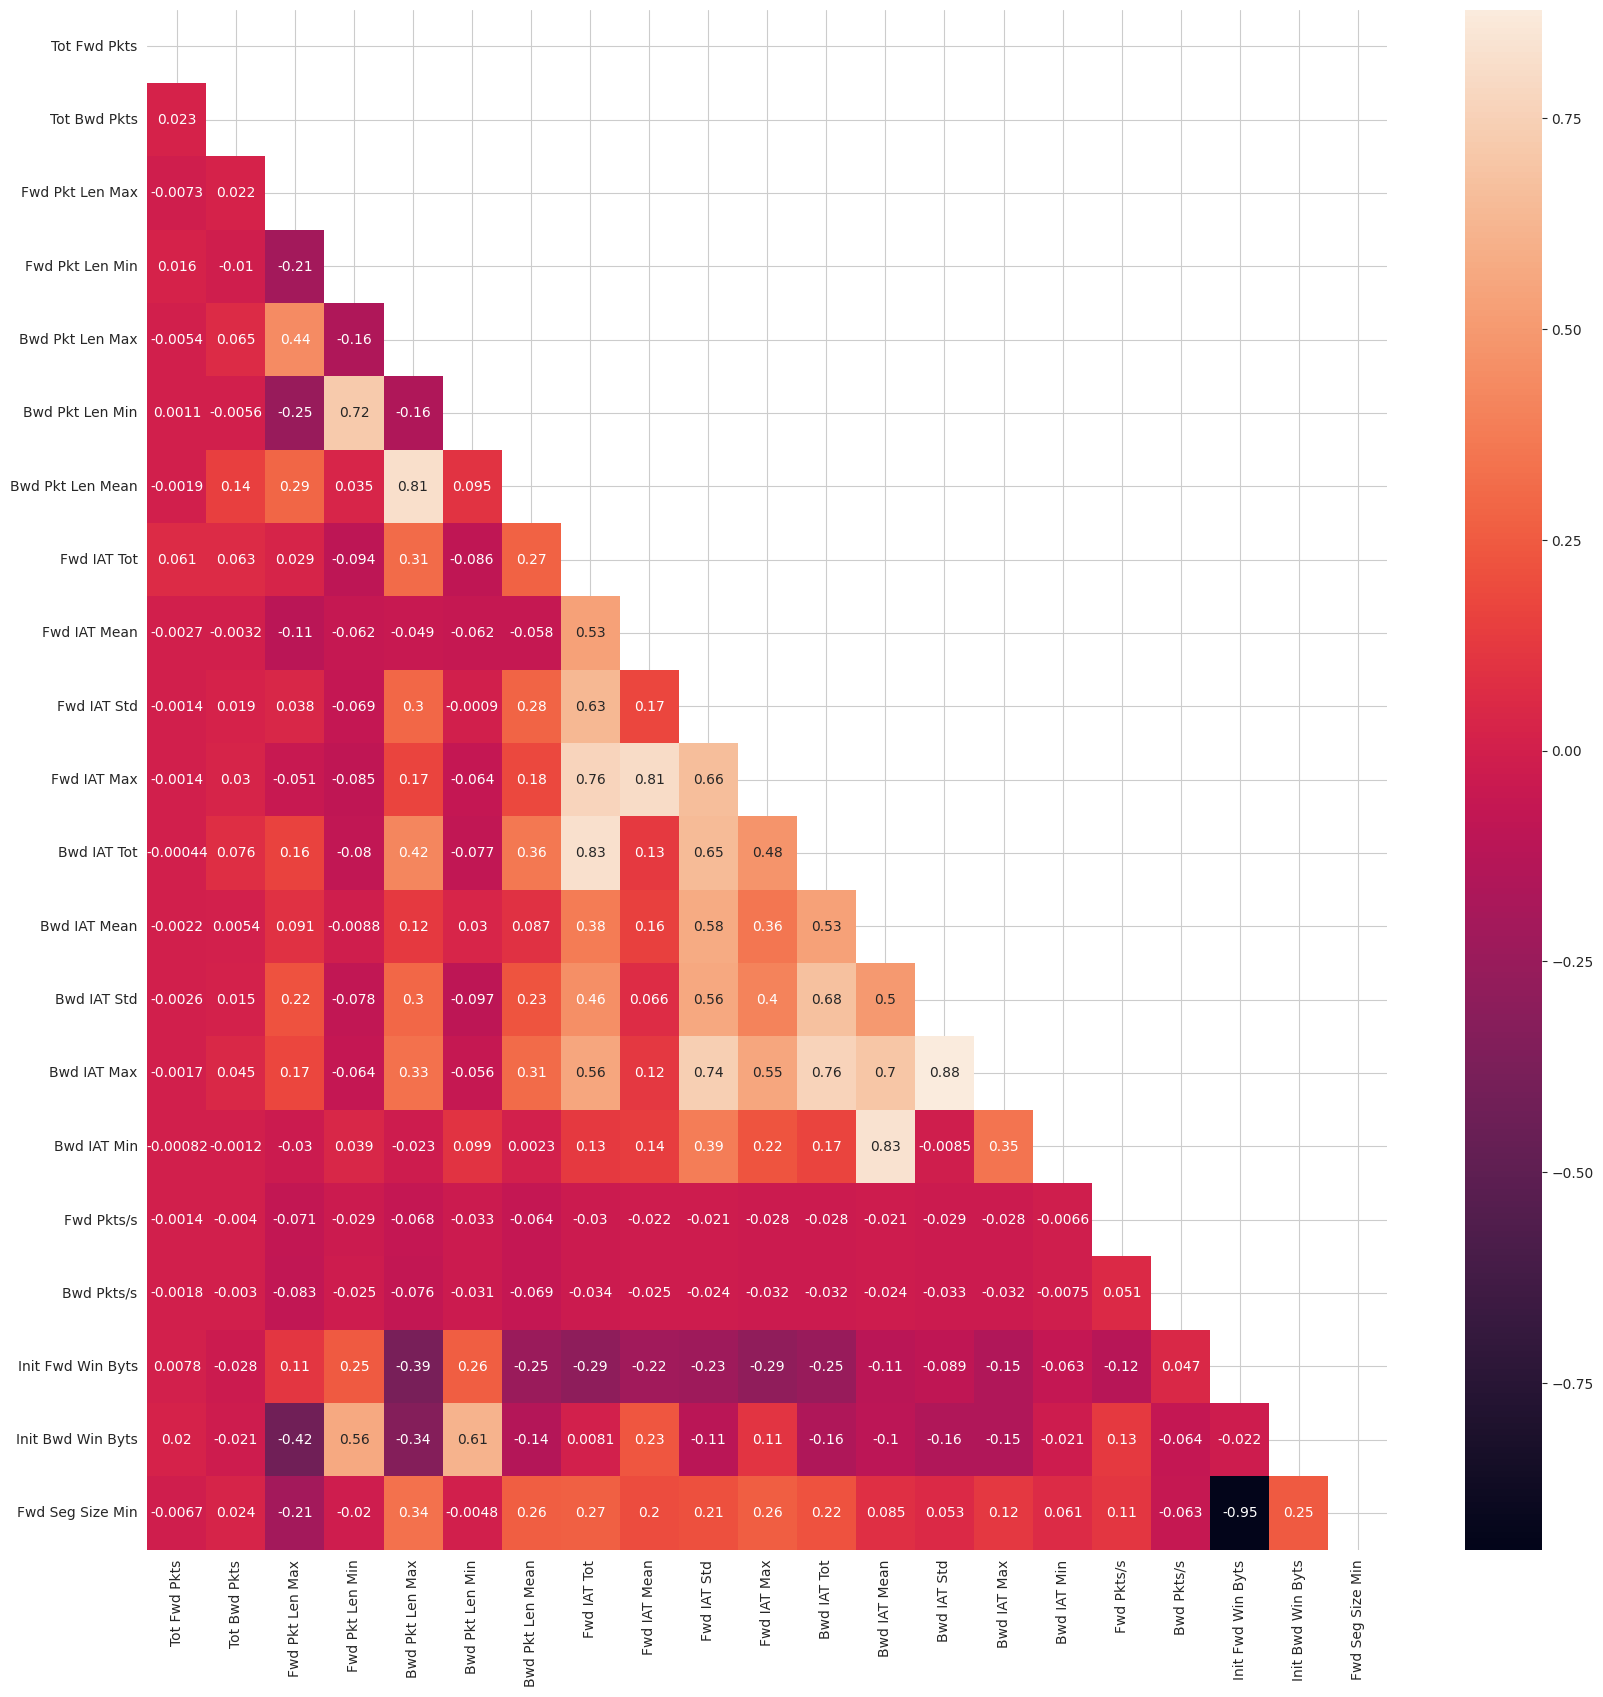

In [ ]:
corr = df[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, mask=mask)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

1    646374
0    630497
Name: Label, dtype: int64

In [ ]:
data_clean.shape


(1276871, 54)

In [ ]:
data_clean.columns


Index(['index', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
       'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Label'],
      dtype='object')

In [ ]:
data_clean.head()

,index,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,4508,80,6,468629,2,5,70.0,0.0,669.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,4513,80,6,506932,6,11,70.0,0.0,1460.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,4514,80,6,534657,6,11,70.0,0.0,1460.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,4516,80,6,3510951,24,44,62.0,0.0,1460.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,4525,80,6,974,2,1,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

#del df

X = data_np[:, 0:52]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,53:]).toarray()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

In [ ]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(956358, 52)
(956358, 2)
(318787, 52)
(318787, 2)


In [ ]:
X.shape


(1275145, 52)

In [ ]:
Y.shape


(1275145, 2)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Dropout
from sklearn import metrics

from tensorflow import keras
import tensorflow as tf

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")


No GPU device found


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# DNN

In [ ]:
# Simple 3 Layer Dense Model
model = Sequential()

model.add(Dense(64, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)

history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=3,
                              verbose=True, callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                3392      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)              

In [ ]:
import pickle

with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
model.save('/kaggle/working/imbal_dnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

9963/9963 [==============================] - 22s 2ms/step


In [ ]:
pred.shape
y_test.shape

(318787,)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[156742,     17],
       [     2, 162026]])

<Axes: >

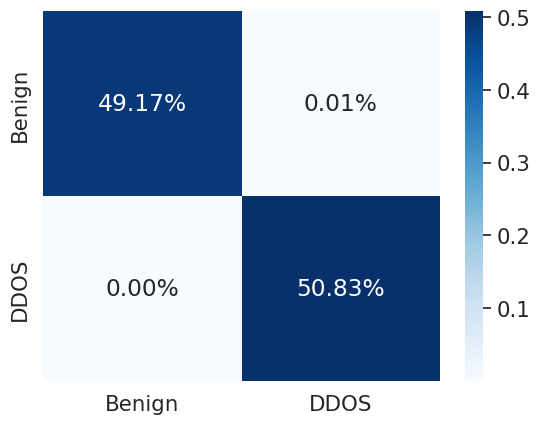

In [ ]:
cf_matrix = confMat

labels = ['Benign','DDOS']

sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cmap='Blues')

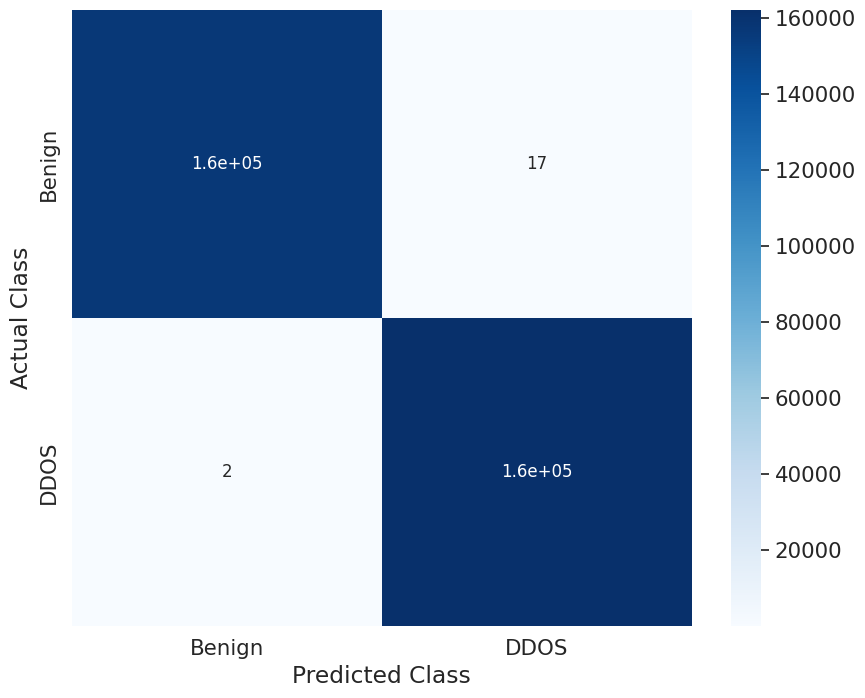

In [ ]:
cm_df = pd.DataFrame(confMat)

labels = ['Benign','DDOS']

plt.figure(figsize=(10,8))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

plt.show()

In [ ]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

9963/9963 [==============================] - 22s 2ms/step
Inference time: 41.20 seconds
Completed
Time taken: 0:01:05.715999
Validation score: 0.9999403990752446
Evaluation score: [0.0002305233501829207, 0.9999403953552246]
Recall score: 0.9999403990752446
Precision score: 0.999940403411248
F1 Measure score: 0.9999403990287474
ROC-AUC score: 0.999939604865244


In [ ]:
from tabulate import tabulate

table = [
    ["Metric", "Score"],
    ["Validation Score", score],
    ["Evaluation Score", escore],
    ["Recall Score", rscore],
    ["Precision Score", ascore],
    ["F1 Measure Score", f1score],
    ["ROC-AUC Score", roc_score],
    ["Inference Time (s)", inference_time]
]

# Format the table using tabulate
formatted_table = tabulate(table, headers="firstrow", tablefmt="fancy_grid")

# Save the formatted table to a text file
with open('metrics_table.txt', 'w') as file:
    file.write(formatted_table)

In [ ]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [ ]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

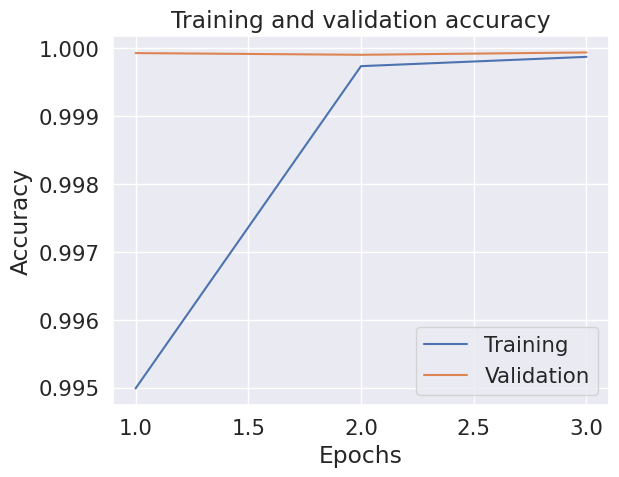

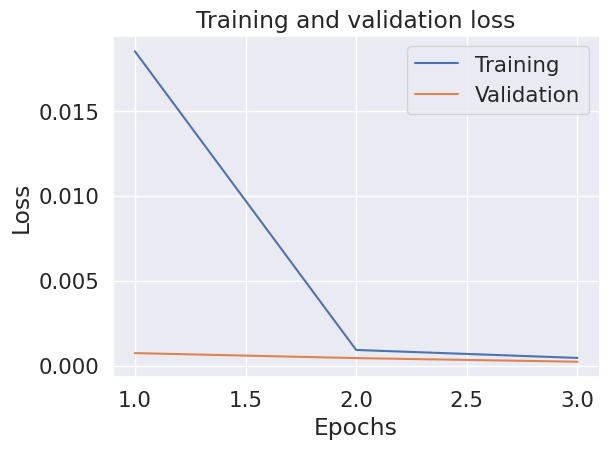

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')

plt.show()
plt.clf()


#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()